# Programatic Data Wrangaling - TMDB Exploratory Data Analysis
##### With Matt Powell

## 1) Is the Data Reliable?

"If the data is not reliable, neither are the insights"

#### Import libraries and data

The initial review of the data:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

data = r'C:\Users\Matth\OneDrive\Desktop\Digital Futures\Projects\TMDB\Data\TMDB_movies.csv'

df = pd.read_csv(data)

In [5]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


#### Cleaning the data - Formatting

Many of the columns were formatted as dictionaries so I was unable to work with the data in these columns.

The columns containing dictionaries were ran through a function to turn them into workable lists.

In [7]:
def extract_dictionaries(x):
    x = ast.literal_eval(x)
    new_list = []
    
    for item in x:
        new_list.append(item['name'])
        
    return new_list

df['genres'] = df['genres'].apply(extract_dictionaries)
df['keywords'] = df['keywords'].apply(extract_dictionaries)
df['production_companies'] = df['production_companies'].apply(extract_dictionaries)
df['production_countries'] = df['production_countries'].apply(extract_dictionaries)
df['spoken_languages'] = df['spoken_languages'].apply(extract_dictionaries)

# Rounded down due to unneccessary number of decimal places

df['popularity'] = round(df['popularity'], 2)

In [8]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.44,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800


#### Narrowing the scope of analysis

I removed many of the columns that I didn't see as useful for the direction of my analysis.  
  
This allowed the dataframe to be more readable

In [10]:
df = df[['budget', 'genres', 'title', 'popularity', 'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'release_date']].reset_index(drop=True)

df.sort_values(by=['revenue'], ascending=False)

,budget,genres,title,popularity,revenue,runtime,status,vote_average,vote_count,release_date
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,150.44,2787965087,162.0,Released,7.2,11800,2009-12-10
25,200000000,"[Drama, Romance, Thriller]",Titanic,100.03,1845034188,194.0,Released,7.5,7562,1997-11-18
16,220000000,"[Science Fiction, Action, Adventure]",The Avengers,144.45,1519557910,143.0,Released,7.4,11776,2012-04-25
28,150000000,"[Action, Adventure, Science Fiction, Thriller]",Jurassic World,418.71,1513528810,124.0,Released,6.5,8662,2015-06-09
44,190000000,[Action],Furious 7,102.32,1506249360,137.0,Released,7.3,4176,2015-04-01
...,...,...,...,...,...,...,...,...,...,...
3200,0,"[Drama, Romance]",The Girl on the Train,2.35,0,105.0,Released,5.6,10,2009-03-18
3199,0,"[Thriller, Mystery, Crime, Drama]",Red Riding: In the Year of Our Lord 1974,7.25,0,102.0,Released,7.0,54,2009-02-28
3197,6500000,"[Crime, Drama, History, War]",Flame & Citron,7.03,0,130.0,Released,6.8,68,2008-03-25
3194,9000000,"[Comedy, Drama]",All or Nothing,2.87,0,128.0,Released,7.0,33,2002-05-17


In [11]:
df.head(4)

,budget,genres,title,popularity,revenue,runtime,status,vote_average,vote_count,release_date
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,150.44,2787965087,162.0,Released,7.2,11800,2009-12-10
1,300000000,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,139.08,961000000,169.0,Released,6.9,4500,2007-05-19
2,245000000,"[Action, Adventure, Crime]",Spectre,107.38,880674609,148.0,Released,6.3,4466,2015-10-26
3,250000000,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,112.31,1084939099,165.0,Released,7.6,9106,2012-07-16


#### Cleaning the data - Removing Nulls

There were three null values in total, across three rows, within the selected data.

The rows either had no other data in the row or they were insignificant enough to be removed from the dataset.

In [13]:
df.isnull().sum()

budget          0
genres          0
title           0
popularity      0
revenue         0
runtime         2
status          0
vote_average    0
vote_count      0
release_date    1
dtype: int64

The null values were removed from the dataset.

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

budget          0
genres          0
title           0
popularity      0
revenue         0
runtime         0
status          0
vote_average    0
vote_count      0
release_date    0
dtype: int64

#### Limitations in the Data - Filling the Gaps
Many movies have either:
- 0 budget whilst the revenue is extremely high, such as 'Wild Hogs'.
- 0 revenue whilst the budget is extremely high, such as 'Wolfman'

There are too many movies to manually fill in.

In [18]:
budget = df[(df['budget'] == 0) & (df['revenue'] > 1_000_000)]\
    .sort_values(by=['revenue'], ascending=False)\
    .reset_index(drop=True)\
    .head(10)

budget.head(1)

,budget,genres,title,popularity,revenue,runtime,status,vote_average,vote_count,release_date
0,0,"[Action, Adventure, Comedy]",Wild Hogs,31.72,253625427,100.0,Released,5.6,648,2007-03-02


In [19]:
revenue = df[(df['revenue'] == 0) & (df['budget'] > 1_000_000)]\
    .sort_values(by=['budget'], ascending=False)\
    .reset_index(drop=True)\
    .head(10)

revenue.head(1)

,budget,genres,title,popularity,revenue,runtime,status,vote_average,vote_count,release_date
0,150000000,"[Drama, Horror, Thriller]",The Wolfman,21.21,0,102.0,Released,5.5,549,2010-02-11


##### What's interesting about these movies?

- They either had a very large budget or very high revenue - they are at the extremes of this analysis
- They were both unpopular and didn't have great ratings

Is this a trend?

In [21]:
budget

,budget,genres,title,popularity,revenue,runtime,status,vote_average,vote_count,release_date
0,0,"[Action, Adventure, Comedy]",Wild Hogs,31.72,253625427,100.0,Released,5.6,648,2007-03-02
1,0,"[Adventure, Comedy]",Crocodile Dundee II,15.47,239606210,110.0,Released,5.5,303,1988-05-19
2,0,"[Adventure, Animation, Comedy, Family]",Alvin and the Chipmunks: The Road Chip,27.87,233755553,92.0,Released,5.8,428,2015-12-17
3,0,"[Mystery, Fantasy, Adventure, Comedy]",Scooby-Doo 2: Monsters Unleashed,22.64,181466833,93.0,Released,5.4,500,2004-03-24
4,0,"[Animation, Comedy, Family]",Garfield: A Tail of Two Kitties,16.93,141702264,78.0,Released,5.1,464,2006-06-15
5,0,"[Music, Drama, Family]",Mr. Holland's Opus,6.78,106269971,137.0,Released,6.9,113,1995-12-29
6,0,[Comedy],The Campaign,16.46,104907746,85.0,Released,5.6,578,2012-08-09
7,0,"[Adventure, Drama, Action, Romance]",House of Flying Daggers,21.06,92863945,119.0,Released,7.1,439,2004-05-19
8,0,"[Comedy, Crime, Drama]",Madea Goes to Jail,3.11,90508336,103.0,Released,6.4,52,2009-02-16
9,0,"[Comedy, Drama, Science Fiction]",About Time,74.82,87100449,123.0,Released,7.8,2067,2013-08-16


In [22]:
revenue

,budget,genres,title,popularity,revenue,runtime,status,vote_average,vote_count,release_date
0,150000000,"[Drama, Horror, Thriller]",The Wolfman,21.21,0,102.0,Released,5.5,549,2010-02-11
1,100000000,"[Action, Adventure, Fantasy, Science Fiction, ...",Dragonball Evolution,21.68,0,85.0,Released,2.9,462,2009-04-01
2,90000000,"[Science Fiction, Action, Drama, Thriller]",Volcano,19.84,0,104.0,Released,5.2,376,1997-04-25
3,90000000,"[Action, Adventure, Family, Fantasy]",Mighty Joe Young,6.64,0,114.0,Released,5.9,208,1998-12-25
4,85000000,"[Comedy, Fantasy, Romance]",Little Nicky,18.34,0,90.0,Released,5.2,438,2000-11-10
5,84000000,"[Fantasy, Comedy, Family, Adventure]",Son of the Mask,17.82,0,94.0,Released,3.6,338,2005-02-18
6,84000000,"[Action, Comedy, Crime, Thriller]",RED 2,44.34,0,116.0,Released,6.4,1526,2013-07-18
7,80000000,"[Drama, Mystery, Thriller]",Instinct,7.39,0,126.0,Released,6.2,146,1999-06-04
8,80000000,[Comedy],Edtv,14.30,0,122.0,Released,5.7,166,1999-03-26
9,75000000,"[Action, Adventure, Comedy, Family]",Inspector Gadget,17.56,0,78.0,Released,4.3,318,1999-07-23


There is a potential trend that movies with lower 'vote_average' ratings had missing details

#### What percentage of films have 0 budget and 0 revenue?
##### Breaking down the data

Films were put into bracketed based on their revenue and budget.

In [25]:
def revenue_binning(r):
    if r == 0:
        return 'No Revenue'
    elif r <= 10_000_000:
        return 'Very Low'
    elif r <= 50_000_000:
        return 'Low'
    elif r <= 100_000_000:
        return 'Moderate'
    elif r <= 500_000_000:
        return 'High'
    elif r <= 1_000_000_000:
        return 'Very High'
    else:
        return 'Blockbuster'

df['revenue_bracket'] = df['revenue'].apply(revenue_binning)

def budget_binning(b):
    if b == 0:
        return 'No budget'
    elif b <= 1_000_000:
        return 'Very Low'
    elif b <= 10_000_000:
        return 'Low'
    elif b <= 25_000_000:
        return 'Moderate'
    elif b <= 50_000_000:
        return 'High'
    elif b <= 100_000_000:
        return 'Very High'
    else:
        return 'Blockbuster Budget'

df['budget_bracket'] = df['budget'].apply(budget_binning)

Now the revenue and bracket columns are brackets, I'm most interested in how many occurences of 0 there are.

There should be almost 0, as there is a budget to almost every film released in cinema.

In [27]:
def no_revenue(df):
    total_values = df.revenue_bracket.value_counts().reset_index()
    total_count = len(df)
    total_values['percent'] = round((total_values['count']/total_count)*100, 2)

    return total_values

def no_budget(df):
    total_values = df.budget_bracket.value_counts().reset_index()
    total_count = len(df)
    total_values['percent'] = round((total_values['count']/total_count)*100, 2)

    return total_values

revenue_data = no_revenue(df)
budget_data = no_budget(df)


#### What percentage of films have 0 budget and revenue?
##### Visualising the data

A visualisation was created for each table to see the relationship between each brackets:

C:\Users\Matth\AppData\Local\Temp\ipykernel_260\1872353351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = revenue_data,


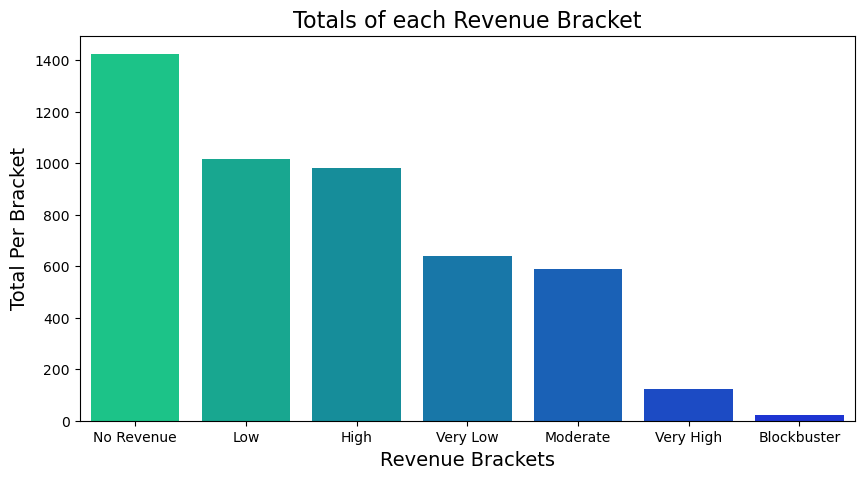

In [29]:
plt.figure(figsize = (10,5))

sns.barplot(data = revenue_data,
            x = 'revenue_bracket',
            y = 'count',
            palette = 'winter_r'
           )

plt.xticks(
    horizontalalignment = 'center',
    fontweight = 'light'
)
plt.xlabel('Revenue Brackets',fontsize=14)
plt.ylabel('Total Per Bracket',fontsize=14)
plt.title('Totals of each Revenue Bracket', fontsize=16)

plt.show()

There are a significant number of movies that are 0 revenue, compared to the rest of the data

C:\Users\Matth\AppData\Local\Temp\ipykernel_260\3056794751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = budget_data,


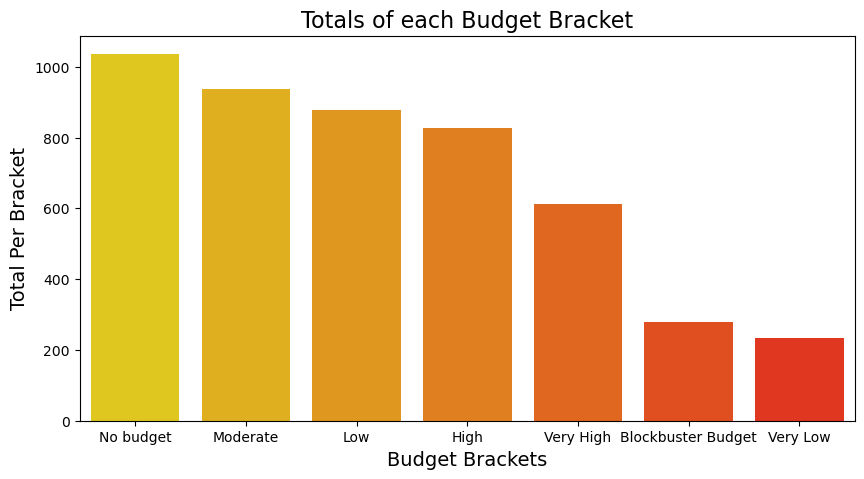

In [31]:
plt.figure(figsize = (10,5))

sns.barplot(data = budget_data,
            x = 'budget_bracket',
            y = 'count',
            palette = 'autumn_r'
           )

plt.xticks(
    horizontalalignment = 'center',
    fontweight = 'light'
)
plt.xlabel('Budget Brackets',fontsize=14)
plt.ylabel('Total Per Bracket',fontsize=14)
plt.title('Totals of each Budget Bracket',fontsize=16)

plt.show()

There are a significant number of movies that have 0 budget, compared to the rest of the data.

Although there are less than less missing values than the revenue column.

#### What does this mean?

The insights from this dataset cannot be fully accurate.  
  

  
The mean values could be inserted in the rows missing values or the rows could be removed completely but will still impact certain insights.  
*(In the interest of time, this wasn't carried out)*

## 2) Is the movie industry getting more profitable and when?

Is the movie industry an industry worth investing?

To find out, the profitability across each decade can be visualised to determine this.

In [36]:
df['gross_profit'] = df['revenue'] - df['budget']

df['year'] = pd.to_datetime(df['release_date'])
df['year'] = pd.to_datetime(df['year']).dt.year
df['month'] = pd.to_datetime(df['release_date']).dt.month
df['decade'] = (df['year'] // 10) * 10

In [37]:
decade_data = df.groupby("decade")["gross_profit"].sum().reset_index()

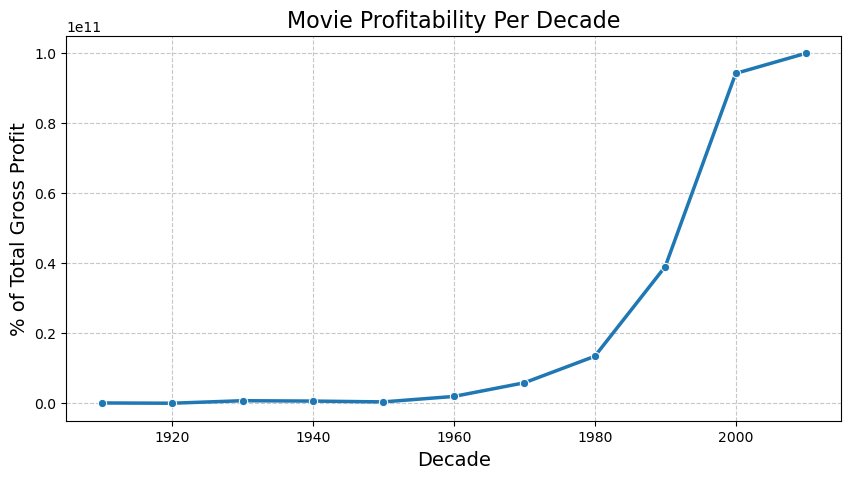

In [38]:
# Plotting data
plt.figure(figsize=(10, 5))
sns.lineplot(x=decade_data['decade'], 
             y=decade_data['gross_profit'], 
             marker='o', 
             linewidth=2.5, 
            )

# Grid and Labels
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('% of Total Gross Profit', fontsize=14)
plt.title('Movie Profitability Per Decade', fontsize=16)

plt.show()

Decade on decade, the movie industry been consistently more profitable except from the 1940s, which is likely due to WW2.

It is noteable that there has been a significant decrease during the 2010s, likely due to the data only going up to the end of 2016, meaning three years of data is missing.  
Therefore the 2010s is not fully indicitive of the final result of the decade.

### When is the most profitable time of year to release a movie?

This is based on the average profit of a movie, depending on the season a movie was released.  

What do you think it is, it may surprise you?

In [41]:
def season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month <= 5:
        return 'Spring'
    elif month <= 8:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(season)

In [42]:
seasonal_profit = df.groupby('season')[['gross_profit']].mean().reset_index()

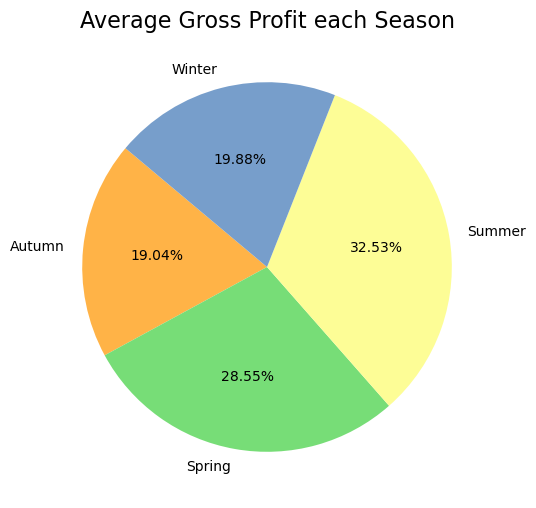

In [43]:
plt.figure(figsize=(6, 6))

plt.pie(seasonal_profit["gross_profit"],
        labels=seasonal_profit["season"], 
        autopct='%1.2f%%',
        colors=['#FFB347', '#77DD77', '#FDFD96', '#779ECB'],
        startangle=140)

plt.title("Average Gross Profit each Season", fontsize=16)

plt.show()



On average, movies are most profitable during the Summer than any other month.

Autmum being the lowest performing season, closely followed by Winter

## Actionable Recommendations

- This dataset is not entirely complete and therefore not completely accurate

- The movie industry is consistently profitable

- The best time of year to release a movie on average is in the summer

**Any questions?**